# Positive vs. Negative Sentiment Classification

Here we demonstrate how to explain a sentiment classification model for movie reviews. positive vs. negative sentim

In [106]:
import numpy as np
import pandas as pd
import transformers
import shap

## Load the IMDB movie review dataset

In [112]:
dataset=pd.read_csv('/content/drive/MyDrive/XAI/train.csv')

# shorten the strings to fit into the pipeline model
short_data = [v[:500] for v in dataset["text"][:30]]

## Load and run a sentiment analysis pipeline

In [113]:
classifier = transformers.pipeline("sentiment-analysis", return_all_scores=True)
classifier(short_data[25:27])
print(dataset['text'][25])
print(dataset['text'][26])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


the free fillin` app on my ipod is fun, im addicted
  I`m sorry.


`return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.


## Explain the sentiment analysis pipeline

In [114]:
# define the explainer
explainer = shap.Explainer(classifier)

In [115]:
# explain the predictions of the pipeline on two samples
shap_values = explainer(short_data[25:27])

  0%|          | 0/240 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [00:24, 12.32s/it]


In [117]:
shap.plots.text(shap_values[:, :, "POSITIVE"])

In [118]:
# explain the predictions of the pipeline on two samples
shap_values = explainer(short_data[25:27])

  0%|          | 0/240 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [00:27, 13.63s/it]


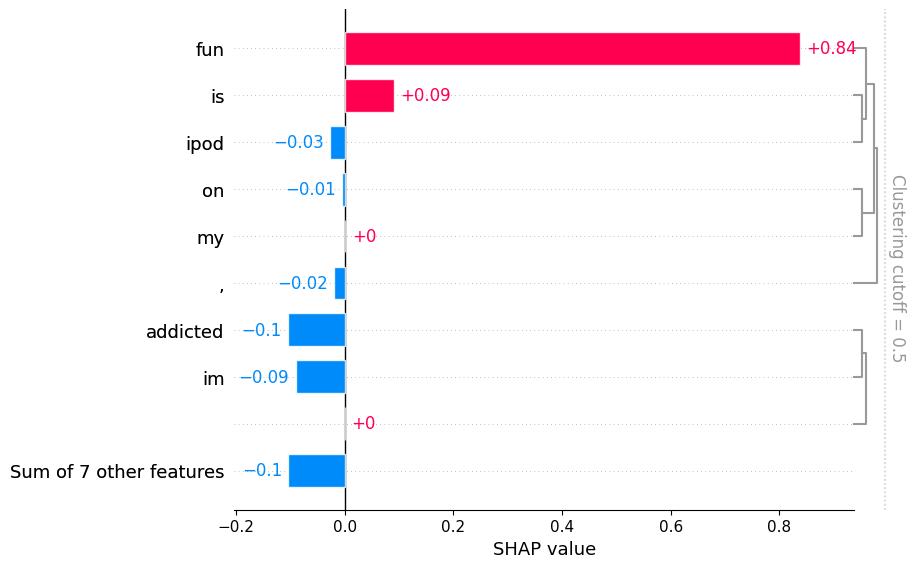

The scentence is :  the free fillin` app on my ipod is fun, im addicted


In [122]:
shap.plots.bar(shap_values[0, :, "POSITIVE"])
print("The scentence is : ",dataset['text'][25])

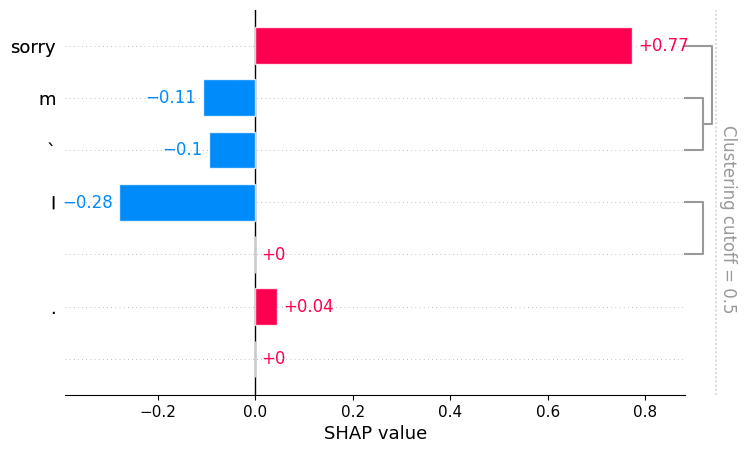

The scentence is :    I`m sorry.


In [123]:
shap.plots.bar(shap_values[1, :, "NEGATIVE"])
print("The scentence is : ",dataset['text'][26])

The explanations show the importance of every word in the scentence. here we have two scentence that are classified as Negative with the base model. so we can see which words have more impact on model prediction. in this scentence "the free fillin` app on my ipod is fun, im addicted" , we can see that the word "fun" has the most positive effect and in this scentence "I'm sorry" the word "sorry" has the most positive effect. the intresting part is the important words highlited by SHAP, are  the same with the selsected text that we got from question answering model.